In [1]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import r_regression, SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load data
train_X = pd.DataFrame(np.load('X_train.npy'))
train_Y = pd.DataFrame(np.load('Y_train.npy'))
test_X = pd.DataFrame(np.load('X_test.npy'))
test_Y = pd.DataFrame(np.load('Y_test.npy'))

# Impute missing values
imputer = IterativeImputer(random_state=42)
train_X_imputed = imputer.fit_transform(train_X)
test_X_imputed = imputer.transform(test_X) 
"""IterativeImputer is a module used to provide multivariate imputation to estimate each feature from all the others, it does this to input missing
feature values as a function of other features ina  round-robin fashion."""

# Convert the imputed data into dataframes 
train_X_imputed = pd.DataFrame(train_X_imputed, columns=train_X.columns)
test_X_imputed = pd.DataFrame(test_X_imputed, columns=test_X.columns)


In [3]:
# Normalization
minMaxScaler = MinMaxScaler(feature_range=(-1, 1))
train_X_normalized = minMaxScaler.fit_transform(train_X_imputed)
test_X_normalized = minMaxScaler.transform(test_X_imputed)  
"""MinMaxScaler transforms the features in a data set to be within a given range, in this case -1 to 1. This scales all data, including outliers,
down to a fixed range which cna be mroe easily managed."""

'MinMaxScaler transforms the features in a data set to be within a given range, in this case -1 to 1. This scales all data, including outliers,\ndown to a fixed range which cna be mroe easily managed.'

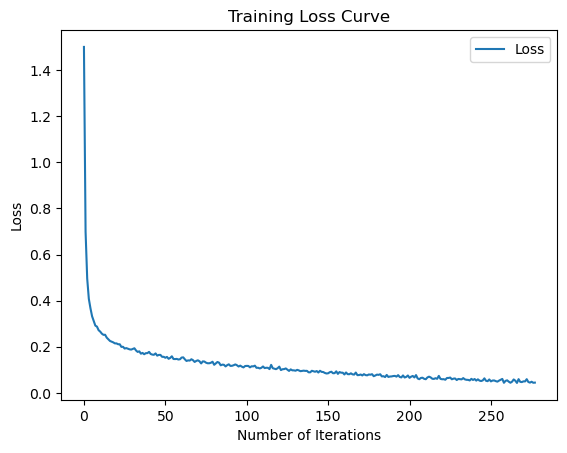

Training Accuracy: 0.9872222222222222
Testing Accuracy: 0.9196296296296296


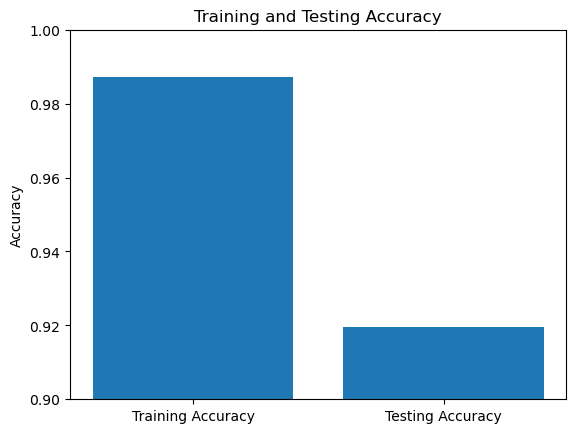

In [4]:
# Initialize the multiLevelPerceptronClassifier
multiLayerPerceptron = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42)
"""MLPClassifier is a function that utilizes a multi layer perceptron to perform classification, hyperparameters such as the number of 
hidden layers and iterations may be specified to more finely tune the algorithm """

# Train the model
multiLayerPerceptron.fit(train_X_normalized, train_Y.values.ravel()) 

# Plot training loss curve
plt.plot(multiLayerPerceptron.loss_curve_, label='Loss')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

# Evaluate the model
training_accuracy = multiLayerPerceptron.score(train_X_normalized, train_Y.values.ravel())
testing_accuracy = multiLayerPerceptron.score(test_X_normalized, test_Y.values.ravel())

print('Training Accuracy:', training_accuracy)
print('Testing Accuracy:', testing_accuracy)

# Plot accuracy
plt.bar(['Training Accuracy', 'Testing Accuracy'], [training_accuracy, testing_accuracy])
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.ylim([0.9, 1])
plt.show()